# Train your first neural network: Image classification for retail products

We will implement a model to classify the images of retail products (predict and label the images in 10 classes such as dress, coat, or shirt).

Import the necessary libraries and print the version of TensorFlow API:

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0-rc3


## Import the Fashion MNIST dataset

We will use the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which contains 70,000 grayscale images in 10 categories. We will use 60,000 images to train the network and 10,000 images to evaluate how accurately the network learned to classify images. The following are some examples of the images (each image is 28 x 28 pixels):

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Import and load the data from TensorFow (the data is already split into test and training sets):

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Like the case we discussed on Tuesday, the *images* are defined as pixel values ranging between 0 and 255 (each image with 28x28=784 of these values). These values correspond to a shade of gray:

<table>
  <tr><td>
    <img src="http://what-when-how.com/wp-content/uploads/2012/07/tmp26dc25_thumb2.png"
         alt="Shades of grey" width="400">
  </td></tr>
  <tr><td align="center">
    <b>Figure 2.</b> 256 (not 50!) shades of grey.<br/>&nbsp;
  </td></tr>
</table>

The *labels* are integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th> 
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td> 
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td> 
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td> 
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td> 
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td> 
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td> 
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td> 
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td> 
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td> 
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td> 
  </tr>
</table>

Assign *class names* to the labels (we will use the class names later when plotting the images):

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore the data

Explore the format of the **training** dataset (60,000 images with each image is represented as 28 x 28 pixels):

In [4]:
train_images.shape

(60000, 28, 28)

Explore the labels of the **training** dataset (each label is an integer between 0 and 9):

In [5]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Explore the format of the **test** dataset (10,000 images with each image is represented as 28 x 28 pixels):

In [6]:
test_images.shape

(10000, 28, 28)

Explore the labels of the **test** dataset (each label is an integer between 0 and 9):

In [7]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

## Preprocess the data

See how an image looks like (28 by 28 pixels, each pixel having a value between 0 and 255):

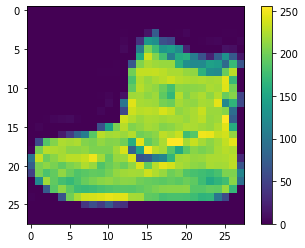

In [8]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

**Normalize** the pixel values to a range of 0 to 1 for both the **training** and **test** datasets (this is how the neural network model expects the input):

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Confirm that the pixel values are now between 0 and 1:

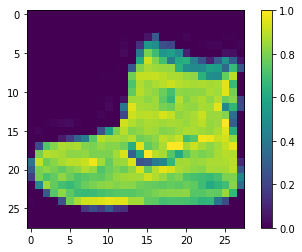

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

Display the first 25 images from the *training set* with the class name below each image and verify that the data looks good:

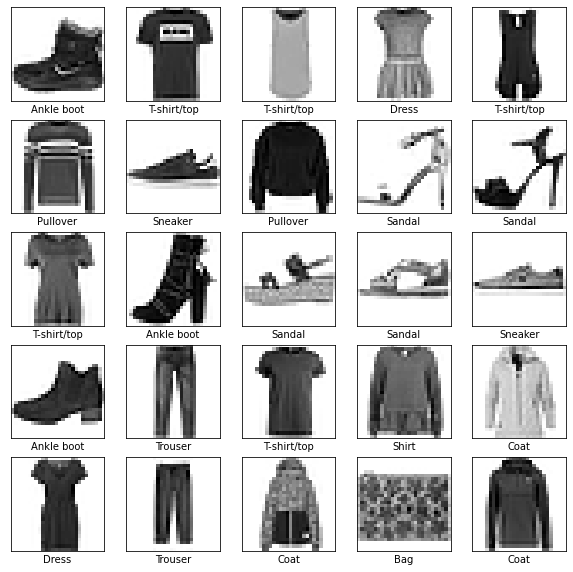

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

## Build the model

Building the neural network requires (1) setting up the layers of the model, then (2) compiling the model.

### Setup the layers

The basic building block of a neural network is the *layer*. Layers extract representations from the data. Create three layers:

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # DO NOT CHANGE ANYTHING IN THIS LAYER
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax) # DO NOT CHANGE ANYTHING IN THIS LAYER
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________



### Compile the model

Define the loss function, optimizer, and performance metric using the model's *compile* step:

In [0]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy']) #The fraction of the images that are correctly classified.

## Train the model

Train the model for 5 epochs using the images and their labels in the training set:

In [14]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4986 - accuracy: 0.8252
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3773 - accuracy: 0.8633
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3362 - accuracy: 0.8771
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3123 - accuracy: 0.8865
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2943 - accuracy: 0.8915


As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.88 (or 88%) on the training data.

## Evaluate the model

Evaluate the accuracy of the model by making predictions using the model in the test dataset:

In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3455 - accuracy: 0.8766
Test accuracy: 0.8766000270843506


## Make predictions

Store the predictions for all images in the test dataset:

In [0]:
predictions = model.predict(test_images)

Display the probabilities in the prediction of the first image:

In [17]:
predictions[0] #222 for a false prediction

array([5.1977599e-07, 7.2688579e-08, 3.6617241e-08, 4.8167351e-08,
       2.4194432e-07, 7.2969017e-03, 1.6526610e-06, 3.8036443e-02,
       1.0701417e-05, 9.5465338e-01], dtype=float32)

Display the label that is predicted with the highest probability:

In [18]:
np.argmax(predictions[0])

9

Check the actual label of the first image:

In [19]:
test_labels[0]

9

Define two helper functions (we will use the functions later when plotting the results):

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Display the 1st image, its predicted label with the probability and its true label:

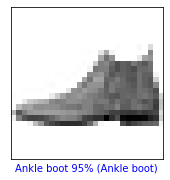

In [21]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
#plt.subplot(1,2,2)
#plot_value_array(i, predictions,  test_labels)

Display the plot of all predicted probabilities for the 1st image:

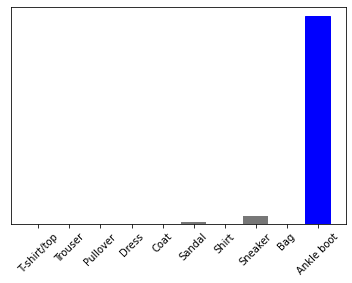

In [22]:
plot_value_array(0, model.predict(np.expand_dims(test_images[0],0)), test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

Display the 223rd image, its predicted label with the associated probability, and its true label:

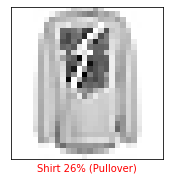

In [23]:
i = 222
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
#plt.subplot(1,2,2)
#plot_value_array(i, predictions,  test_labels)

Display the plot of all predicted probabilities for the 223rd image:

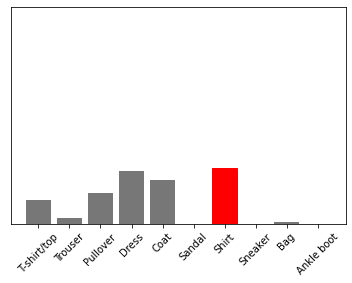

In [24]:
plot_value_array(0, model.predict(np.expand_dims(test_images[222],0)), test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

Plot several images with their predictions (correct prediction labels are blue and incorrect ones are red):

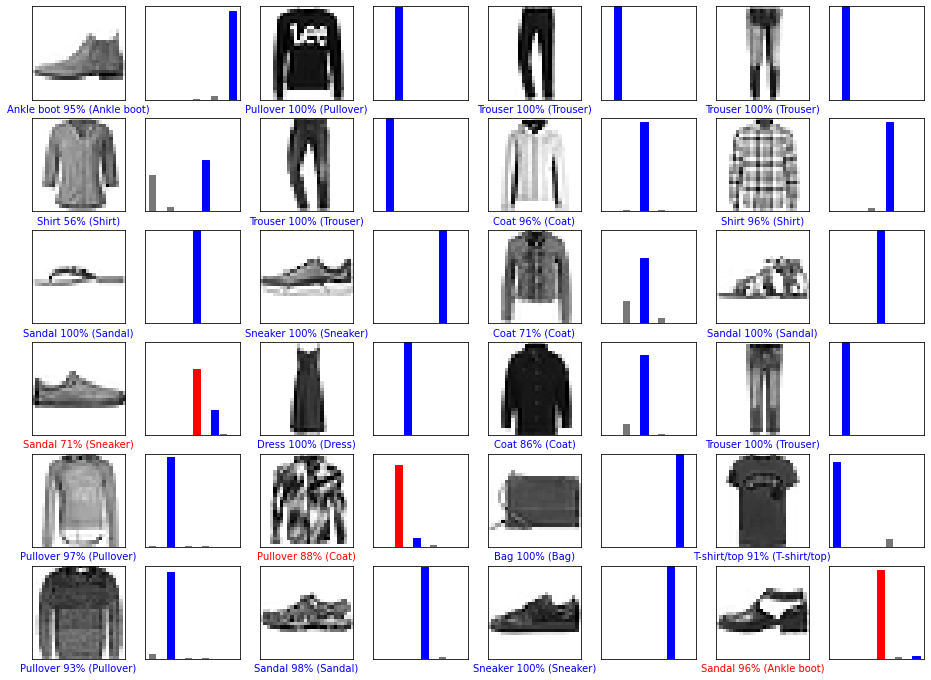

In [25]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 6
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)


Let's remember the accuracy we achieved in this example:

In [26]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3455 - accuracy: 0.8766
0.8766000270843506


#Improving the accuracy using convolutions (hence, Convolutional Neural Networks)




We will use the exact same dataset but we will reshape it a bit to make it compatible with the convolution layers we will add to the network:

In [0]:
train_images = train_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

The code below is the same neural network we built, but this time with convolutional layers added. By the way, notice the first convolutional layer and the input shape. The third dimension is the color dimension (3 if RGB):

In [28]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

Let's compile and fit the model in the same chunk this time:

In [29]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4501 - accuracy: 0.8348
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3018 - accuracy: 0.8892
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2527 - accuracy: 0.9074
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2227 - accuracy: 0.9175
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1954 - accuracy: 0.9262


Let's check the accuracy again, after adding two convolution (and pooling) layers:

In [30]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.2722 - accuracy: 0.9057
0.9057000279426575


By the way, what do you think would happen if we increased the number of epochs?

Let's look at convolutions more closely. We will first check the labels in the test set:

In [31]:
print(test_labels[:100]) #Pick three images with the same label (1 is pants)

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


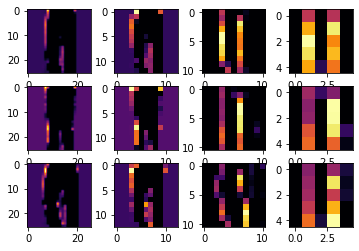

In [32]:
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=2
SECOND_IMAGE=3
THIRD_IMAGE=5
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

#What to do now (for a bonus)?

If you want, test different network structures, train and evaluate the model, and report the **Test accuracy** each time. Test accuracy is reported in the **"Evaluate the model"** step. Experiment with (1) the number and type of network layers and (2) the number of neurons in each layer. Create and test at least five combinations, and report your results in a table.

For example, if you make the following change in **"Setup the layers"** step:

From...
```
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
```

To...
```
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.sigmoid),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
```

You would have added one more Sigmoid layer to the model with 64 neurons, just after the ReLU layer.


---

# Copyright 2018 The TensorFlow Authors.
# Adapted in 2020 by Gorkem Turgut OZER for educational purposes.

In [0]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [0]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.